<a href="https://colab.research.google.com/github/MohuaSinha/EVA4/blob/master/S12/Assignment%20B/S12_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
import os 
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/S12'
sys.path.append(workingdir)

In [0]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [20]:
#Read COCO JSON File
fptr = open('/content/gdrive/My Drive/Colab Notebooks/EVA4/S12/data/Annotations_via_export_coco.json')
data = json.load(fptr)
print(data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


In [0]:
#Extract Details
images_df = pd.DataFrame(data['images'], columns = data['images'][0].keys())
annotations_df = pd.DataFrame(data['annotations'], columns = data['annotations'][0].keys())

In [22]:
images_df.head()

,id,width,height,file_name,license,date_captured
0,0,236,354,1.jpg,1,
1,1,500,889,2.jpg,1,
2,2,500,333,3.jpg,1,
3,3,500,667,4.jpg,1,
4,4,500,332,5.jpg,1,


In [23]:
annotations_df.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,0,0,1,"[21, 70, 104, 70, 104, 290, 21, 290]",18260,"[21, 70, 83, 220]",0
1,1,1,1,"[75, 284, 427, 284, 427, 856, 75, 856]",201344,"[75, 284, 352, 572]",0
2,2,2,1,"[194, 90, 402, 90, 402, 320, 194, 320]",47840,"[194, 90, 208, 230]",0
3,3,3,1,"[33, 200, 494, 200, 494, 666, 33, 666]",214826,"[33, 200, 461, 466]",0
4,4,4,1,"[185, 102, 363, 102, 363, 324, 185, 324]",39516,"[185, 102, 178, 222]",0


In [0]:
#Extract the Box Dimensions
dogs_df = pd.concat([images_df, annotations_df], 1)[['file_name', 'width', 'height', 'bbox']]
x_list = []
y_list = []
w_list = []
h_list = [] 
for row in range(dogs_df.shape[0]):
  x = dogs_df['bbox'][row][0]
  y = dogs_df['bbox'][row][1]
  w = dogs_df['bbox'][row][2]
  h = dogs_df['bbox'][row][3]
  x_list.append(x)
  y_list.append(y)
  w_list.append(w)
  h_list.append(h)
box_df = pd.DataFrame(list(zip(x_list, y_list, w_list, h_list)), columns =['x', 'y', 'box_width', 'box_height'])
dogs_df = pd.concat([dogs_df, box_df], 1)
dogs_df = dogs_df.drop('bbox', axis =1)

In [25]:
dogs_df.head()

,file_name,width,height,x,y,box_width,box_height
0,1.jpg,236,354,21,70,83,220
1,2.jpg,500,889,75,284,352,572
2,3.jpg,500,333,194,90,208,230
3,4.jpg,500,667,33,200,461,466
4,5.jpg,500,332,185,102,178,222


In [0]:
#Normalize the Box Dimensions based on Image Height and Width
dogs_df['x'] = dogs_df['x'] / dogs_df['width']
dogs_df['y'] = dogs_df['y'] / dogs_df['height']
dogs_df['box_width'] = dogs_df['box_width'] / dogs_df['width']
dogs_df['box_height'] = dogs_df['box_height'] / dogs_df['height']

In [27]:
dogs_df.head()

,file_name,width,height,x,y,box_width,box_height
0,1.jpg,236,354,0.088983,0.197740,0.351695,0.621469
1,2.jpg,500,889,0.150000,0.319460,0.704000,0.643420
2,3.jpg,500,333,0.388000,0.270270,0.416000,0.690691
3,4.jpg,500,667,0.066000,0.299850,0.922000,0.698651
4,5.jpg,500,332,0.370000,0.307229,0.356000,0.668675


In [0]:
hw_array = dogs_df[["box_width", "box_height"]].to_numpy()

In [29]:
hw_array.shape

(50, 2)

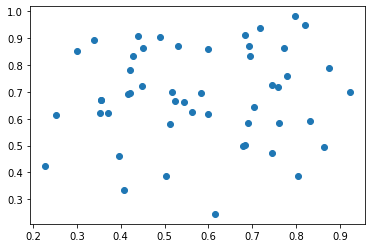

In [30]:
plt.scatter(hw_array[:,0], hw_array[:,1])

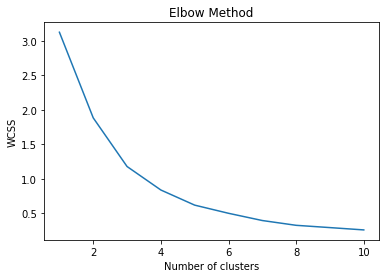

In [31]:
#Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(hw_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

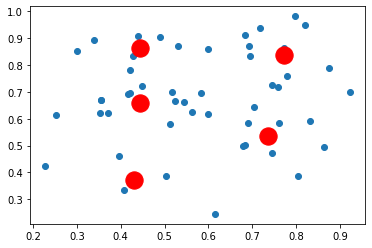

In [32]:
#Determine the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(hw_array)
plt.scatter(hw_array[:,0], hw_array[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()